In [1]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import math
%matplotlib inline

In [2]:
# Load previous hazard curve

# IM values to consider
x = np.logspace(-3, np.log10(2), num=100) 
# (from ch6/psha_example_calcs_GR.m)
lambda_x = [0.0499999999999835,0.0499999999999526,0.0499999999998669,0.0499999999996345,0.0499999999990176,0.0499999999974144,0.0499999999933375,0.0499999999831917,0.0499999999584814,0.0499999998995826,0.0499999997621849,0.0499999994484950,0.0499999987475601,0.0499999972146465,0.0499999939334784,0.0499999870593386,0.0499999729633268,0.0499999446707956,0.0499998890860822,0.0499997821909026,0.0499995809611956,0.0499992101351074,0.0499985411650159,0.0499973597118274,0.0499953169575537,0.0499918589711437,0.0499861276172992,0.0499768264207973,0.0499620458657973,0.0499390453471067,0.0499039938718262,0.0498516789024106,0.0497752023107870,0.0496656935777901,0.0495120817263140,0.0493009769325844,0.0490167177301840,0.0486416375228157,0.0481565925664885,0.0475417716599423,0.0467777762788488,0.0458469217463872,0.0447346702805233,0.0434310719208310,0.0419320663410720,0.0402404933156301,0.0383666756121702,0.0363284753012917,0.0341507789548300,0.0318644315090385,0.0295047030249437,0.0271094271027446,0.0247169857853305,0.0223643281392259,0.0200851972516911,0.0179087063031132,0.0158583552476435,0.0139515239705416,0.0121994242741281,0.0106074489453449,0.00917582621898981,0.00790047393385860,0.00677394856623091,0.00578639701584792,0.00492643928524683,0.00418193363858863,0.00354059865814674,0.00299048611434400,0.00252031323130196,0.00211967238204122,0.00177914094532868,0.00149031496570583,0.00124578853774161,0.00103909759475864,0.000864642934085106,0.000717603509591866,0.000593847667147087,0.000489847276838750,0.000402597661454561,0.000329544772875408,0.000268520118584374,0.000217683367966791,0.000175472258661902,0.000140559281498994,0.000111814575336414,8.82744592427963e-05,6.91150373044643e-05,5.36303153811853e-05,4.12142659388887e-05,3.13462711919490e-05,2.35793746149071e-05,1.75307851282250e-05,1.28741130601395e-05,9.33287420074566e-06,6.67487504051842e-06,4.70718178205709e-06,3.27146869982854e-06,2.23962826983520e-06,1.50959805555399e-06,1.00141231896129e-06]
# pick a hazard curve to use
lambdaIM = lambda_x
dLambda = np.abs(np.diff(lambdaIM + [0]))  # derivative of hazard curve


In [3]:
# Base vulnerability model
a = 100
b = 1.3
betaIM = 0.4

In [4]:
# Loss exceedance curve
dLoss = 0.1
loss = [0] + np.arange(dLoss, 100+dLoss, dLoss).tolist()
lambdaExceed = []
for i in range(len(loss)):
    pExceed = 1 - lognorm.cdf(loss[i], betaIM, loc=0, scale=a * x ** b) # p(L>loss(i)|IM)
    lambdaExceed.append(np.sum(pExceed*dLambda))

[Text(0, 0, '0.1'), Text(0, 0, '1'), Text(0, 0, '10'), Text(0, 0, '100')]

<Figure size 432x288 with 0 Axes>

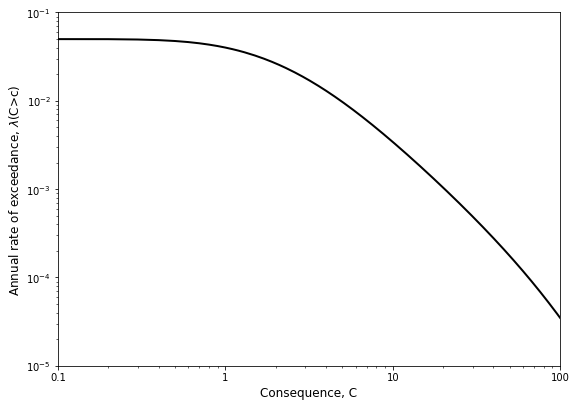

In [5]:
# Expected annual loss
meanLoss = (a * x ** b) * np.exp(0.5 * betaIM ** 2) # mean loss given IM (using formula for mean of a lognormal distribution)
AAL = np.sum(meanLoss * dLambda) # sum mean loss given IM * dlamda 
AAL2 = np.sum(lambdaExceed) * dLoss # use area under exceedance curve

# Plot Fig 9.9
plt.figure(1)
fig, ax = plt.subplots(figsize=(9, 6.5))
ax.loglog(loss, lambdaExceed, '-k', linewidth=2)
ax.set_ylabel('Annual rate of exceedance, $\lambda$(C>c)', fontsize = 12)
ax.set_xlabel('Consequence, C', fontsize = 12)
ax.set_ylim(10**(-5), 10**(-1))
ax.set_xlim(0.1,100)
ax.set_xticks([0.1, 1, 10, 100])
ax.set_xticklabels(['0.1','1','10','100'])

Text(-0.1, -0.1, '(b)')

<Figure size 432x288 with 0 Axes>

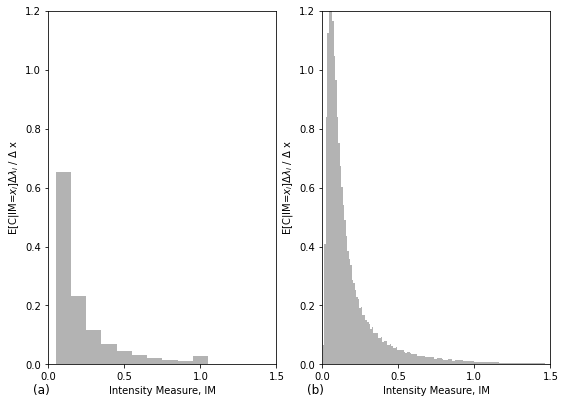

In [14]:
# Coarsely discretized AAL

xCoarse = np.arange(0.1, 1.1, step = 0.1)
dxCoarse = 0.1   # step size of IM intervals

lambdaIMCoarse = [0.009200766, 0.0021162, 0.000819076, 0.000399591, 0.000220265, 0.00013068, 8.15E-05, 5.27E-05, 3.50E-05, 2.38E-05]

dLambdaCoarse =  np.abs(np.diff(lambdaIMCoarse + [0]))  # derivative of hazard curve
meanC = (a * (xCoarse+dxCoarse/2) ** b) * np.exp(0.5 * betaIM ** 2)
product = dLambdaCoarse * meanC
AAL3 = np.sum(product)

# Plot Fig 9.10
plt.figure(2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,6.5))
ax1.bar(xCoarse, dLambdaCoarse*meanC/dxCoarse, width=0.1, color=[0.7, 0.7, 0.7])
ax1.set_xlabel('Intensity Measure, IM')
ax1.set_ylabel('E[C|IM=$x_i] \Delta \lambda_i$ / $\Delta$ x')
ax1.set_xlim(0, 1.5)
ax1.set_ylim(0, 1.2)
ax1.set_xticks(np.arange(0, 2, step = 0.5))
ax1.text(-0.1, -0.1, '(a)', fontsize=12)

# re-discretize the fine-discretization case to linear spacing
dx = 0.01
xLin = np.arange(0.01, 2.01, step = 0.01)  # IM values to consider 
interpF = interp1d(x,lambdaIM) 
lambdaIMLin = interpF(xLin)

dLambdaLin = np.abs(np.diff(lambdaIMLin.tolist() + [0])) # derivative of hazard curve


meanLossLin = (a * xLin ** b) * np.exp(0.5 * betaIM ** 2)  # mean loss given IM (using formula for mean of a lognormal distribution)
AAL4 = np.sum(meanLossLin * dLambdaLin) # sum mean loss given IM * dlamda 


ax2.bar(xLin, meanLossLin*dLambdaLin/dx, width=0.01, color=[0.7, 0.7, 0.7])
ax2.set_xlabel('Intensity Measure, IM')
ax2.set_ylabel('E[C|IM=$x_i] \Delta \lambda_i$ / $\Delta$ x')
ax2.set_xlim(0, 1.5)
ax2.set_ylim(0, 1.2)
ax2.set_xticks(np.arange(0, 2, step = 0.5))
ax2.text(-0.1, -0.1, '(b)', fontsize=12)

In [7]:
# Exceedance Probability simple example
# example calculation for Chapter 9 subsec:risk_loss_exceedance

# numbers from Chapter 1 subsec:intro_illustrative_calc
IM = np.arange(0.1, 0.4, step=0.1)
rates = [0.06, 0.016, 0.003]

P_Ex = [0.1, 0.4, 0.6] # newly assumed values
duration = 1 

dLambdaSimple = np.abs(np.diff(rates +[0]))

# equation~\ref{eq:risk_exceedance_probability_curve_discrete}
lambdaExceed = np.sum(P_Ex * dLambdaSimple)
PExceed = 1 - np.exp(-1 * lambdaExceed * duration)

# approximate approach
P_IM = 1 - np.exp(-1 * dLambdaSimple * duration)

compareRates = [dLambdaSimple * duration, P_IM]

PExceedApprox = np.sum(P_Ex * P_IM)

comparePExceed = [PExceed, PExceedApprox]

In [8]:
# revised Exceedance Probability numbers
rates = [i*20 for i in rates]

dLambdaSimple = np.abs(np.diff(rates + [0]))

# equation~\ref{eq:risk_exceedance_probability_curve_discrete}
lambdaExceed = np.sum(P_Ex * dLambdaSimple)
PExceed = 1 - np.exp(-1 * lambdaExceed * duration)

# approximate approach
P_IM = 1 - np.exp(-1 * dLambdaSimple * duration)

compareRates = [dLambdaSimple*duration, P_IM]

PExceedApprox = np.sum(P_Ex * P_IM)

comparePExceed = [PExceed, PExceedApprox]